In [55]:
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 12,9
import matplotlib.pyplot as plt

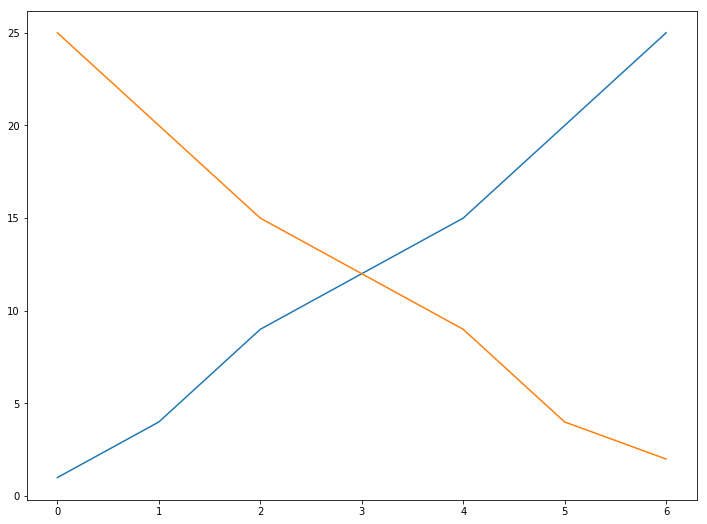

In [56]:
plt.plot([1, 4, 9, 12, 15, 20, 25])
plt.plot([25, 20, 15, 12, 9, 4, 2])

In [57]:
path_to_data = "names/"

In [58]:
path_to_data

'names/'

In [59]:
def read_year(years):
    filenames = []
    names = pd.DataFrame()
    result = pd.DataFrame()
    for k in years:
        filenames = (path_to_data + 'yob'+ str(k) + '.txt')
        names_t = pd.read_csv(filenames, names=['Name','Gender','Count'])
        names_t['Year'] = k
        names = pd.concat([names, names_t])
    return names

In [60]:
mydata01 = read_year(list(range(1900,2000)))

pd.set_option('display.max_rows',10)


In [61]:
print(mydata01[mydata01['Name']=='Ruth'].groupby(['Year']).sum().head(10))

      Count
Year       
1900   4781
1901   3989
1902   4401
1903   4531
1904   4915
1905   5088
1906   5159
1907   5588
1908   6200
1909   6526


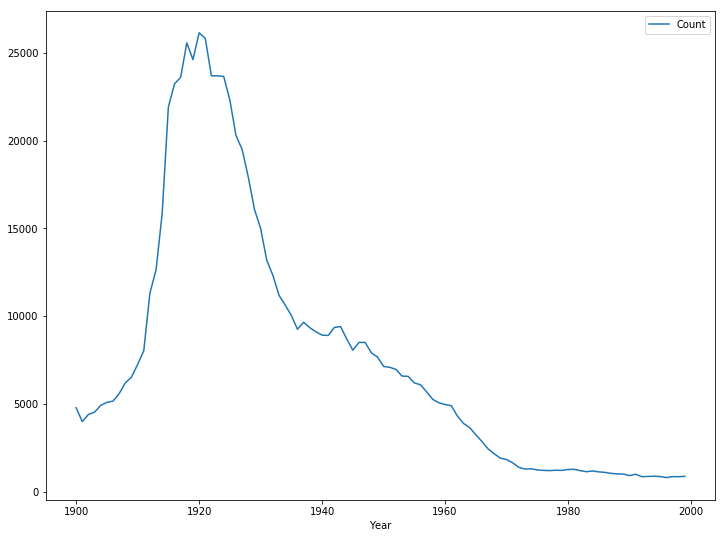

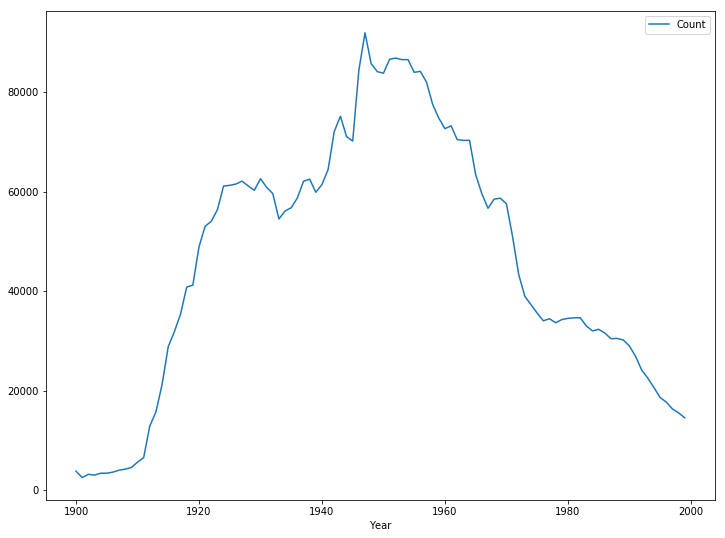

In [62]:
#ruth_result = mydata01[mydata01['Name']=='Ruth']
#robert_result = mydata01[mydata01['Name']=='Robert']
mydata01[mydata01['Name']=='Ruth'].groupby(['Year']).sum().plot()
mydata01[mydata01['Name']=='Robert'].groupby(['Year']).sum().plot()

In [11]:
print(ruth_result.head(5))
print(robert_result.head(5))

      Name Gender  Count  Year
4     Ruth      F   4765  1900
2868  Ruth      M     16  1900
4     Ruth      F   3974  1901
2470  Ruth      M     15  1901
4     Ruth      F   4384  1902
        Name Gender  Count  Year
756   Robert      F     24  1900
2229  Robert      M   3821  1900
849   Robert      F     16  1901
1949  Robert      M   2543  1901
769   Robert      F     21  1902


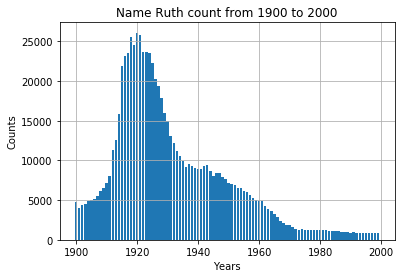

In [53]:
plt.bar(ruth_result['Year'], ruth_result['Count'] )
plt.xlabel('Years')
plt.ylabel('Counts')
plt.title('Name Ruth count from 1900 to 2000')
plt.grid()

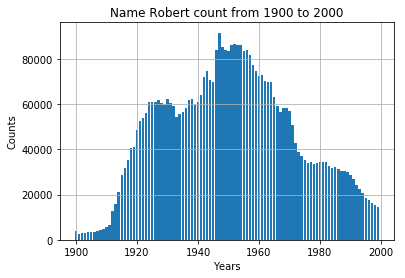

In [54]:
plt.bar(robert_result['Year'], robert_result['Count'])
plt.xlabel('Years')
plt.ylabel('Counts')
plt.title('Name Robert count from 1900 to 2000')
plt.grid()

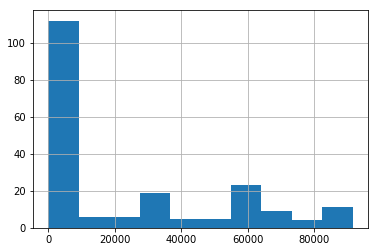

In [57]:
robert_result.Count.hist()

In [13]:
mydata02 = read_year(list(range(1900,2000,5)))


In [14]:
mydata02_year_sum = mydata02.groupby('Year').sum()

In [24]:
print(mydata02_year_sum.head(10))

        Count
Year         
1900   450278
1905   423930
1910   590717
1915  1832457
1920  2262672
1925  2333326
1930  2223273
1935  2089659
1940  2302413
1945  2652659


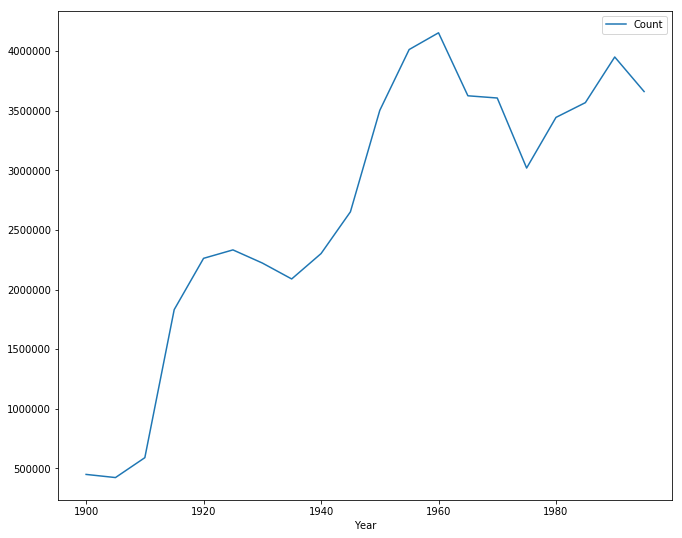

In [25]:
rcParams['figure.figsize'] = 11,9
mydata02_year_sum.plot()

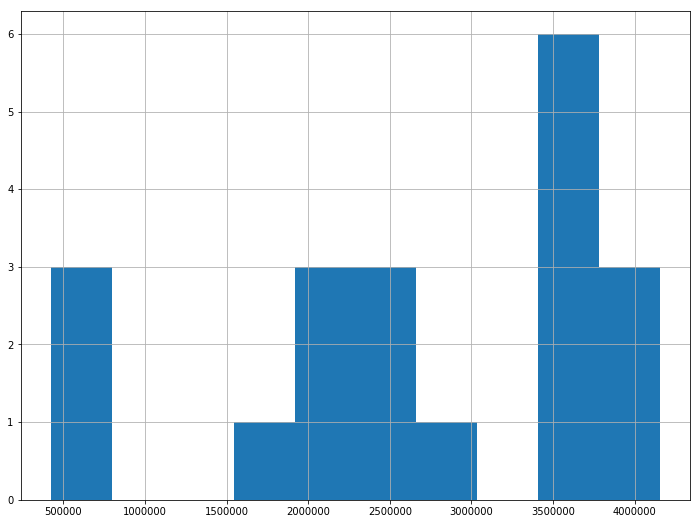

In [26]:
rcParams['figure.figsize'] = 12,9
mydata02_year_sum.Count.hist()

In [17]:
mydata03 = read_year([1950])

In [18]:
r_name_result = mydata03[mydata03['Gender'] != 'F'].head(10)
r_name_result

,Name,Gender,Count,Year
6111,James,M,86224,1950
6112,Robert,M,83559,1950
6113,John,M,79424,1950
6114,Michael,M,65144,1950
6115,David,M,60727,1950
6116,William,M,60689,1950
6117,Richard,M,51000,1950
6118,Thomas,M,45599,1950
6119,Charles,M,39102,1950
6120,Gary,M,33749,1950


In [19]:
mydata03[mydata03.Name.str[0] == 'R'].sort_values('Count',ascending=False).head(10)
rres = mydata03[mydata03.Name.str[0] == 'R'].sort_values('Count',ascending=False).head(10)

In [20]:
print(rres)

         Name Gender  Count  Year
6112   Robert      M  83559  1950
6117  Richard      M  51000  1950
6122   Ronald      M  29914  1950
6137    Roger      M  12549  1950
6141  Raymond      M  11180  1950
35    Rebecca      F   9427  1950
48       Ruth      F   7128  1950
6161      Roy      M   6455  1950
55       Rita      F   6423  1950
6162    Ralph      M   6404  1950


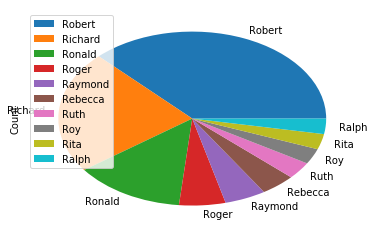

In [21]:
rres.set_index('Name', inplace=True)
rres.plot(kind='pie', y = 'Count', legend = True)
#plt.legend(rres['Name'])

In [23]:
import seaborn as sns


In [54]:
print(mydata01.head(5))


       Name Gender  Count  Year
0      Mary      F  16706  1900
1     Helen      F   6343  1900
2      Anna      F   6114  1900
3  Margaret      F   5304  1900
4      Ruth      F   4765  1900


In [31]:
mydata01_sum = mydata01.groupby('Name').sum()

In [50]:
print(mydata01_sum.head(15))

          Count   Year  cons
Name                        
Aadam        52  17947     2
Aadil        71  15956     2
Aaditya      19   5994     2
Aage          7   1915     1
Aagot         5   1915     2
Aailiyah      5   1995     2
Aailyah      27   7984     2
Aaisha       77  19906     2
Aajah         6   1998     2
Aakash      370  37807     3
Aakeem       11   3983     2
Aakilah      11   1999     3
Aala          6   1994     1
Aalaiyah      5   1997     2
Aalap         6   1990     2


In [ ]:
mydata01_sum['cons'] = mydata01_sum.index.str.lower().str.count(r'[bcdfghjklmnpqrstvwxz]')

/Users/m.lutfulin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/m.lutfulin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


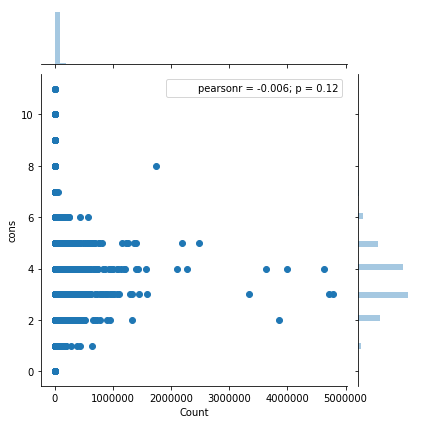

In [53]:
sns.jointplot(x='Count', y='cons', 
              data=mydata01_sum, kind='scatter')